## Finding the max sharpe ratio portfolio

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
%matplotlib inline
import edhec_risk_kit as erk
ind= erk.get_ind_returns()
er=erk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

In [2]:
from scipy.optimize import minimize
import pandas as pd 
import numpy as np 
def msr(riskfree_rate,er,cov):
    """
    computing max sharpe ratio. 
    """
    n=er.shape[0]
    init_guess=np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_1= {
         'type':'eq',
         'fun': lambda weights: np.sum(weights)-1
         }
    def neg_sharpe_ratio(weights,riskfree_rate,er,cov):
        """
        Returns negative of sharpe ratio given weights
        """
        r=erk.portfolio_return(weights,er)
        vol=erk.portfolio_vol(weights,cov)
        return -(r - riskfree_rate)/vol

    results = minimize(neg_sharpe_ratio,init_guess,
                       args=(riskfree_rate,er,cov,), method="SLSQP",
                       options={'disp':False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds   
                       )
    return results.x          

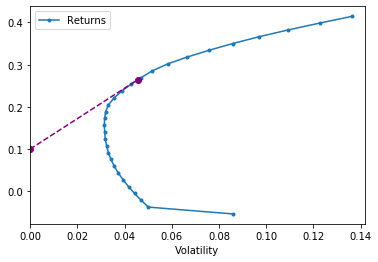

In [3]:
ax= erk.plot_ef(30,er,cov)
ax.set_xlim(left=0)
rf=0.1
w_msr= msr(rf,er,cov)
r_msr=erk.portfolio_return(w_msr,er)
vol_msr=erk.portfolio_vol(w_msr,cov)
# Drawing cml-Capital market line.
cml_x=(0,vol_msr)
cml_y=(rf,r_msr)
ax.plot(cml_x,cml_y,color="Purple",marker="o",linestyle="dashed")


## In the above graph, Capital market line(CML) is a graph that reflects the expected return of a portfolio consisting all the possible proportions between risk free asset and market portfolio. the tangency point represents the market portfolio.

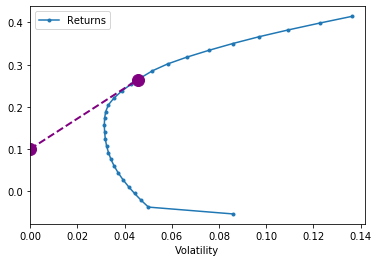

In [4]:
erk.plot_ef(30,er,cov,show_cml=True)

In [5]:
w_msr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.90084874e-15,
       0.00000000e+00, 0.00000000e+00, 5.87020886e-15, 4.55961446e-01,
       3.87954354e-15, 1.25452514e-14, 1.17230306e-14, 7.96156985e-15,
       1.70081958e-15, 2.33810823e-01, 7.46387835e-15, 0.00000000e+00,
       2.55938437e-14, 1.38704162e-01, 0.00000000e+00, 8.94092021e-02,
       0.00000000e+00, 3.79007604e-15, 1.55177181e-02, 0.00000000e+00,
       2.98124412e-15, 0.00000000e+00, 6.65966493e-02, 1.22299292e-16,
       0.00000000e+00, 1.16411715e-14])